In [1]:
pip install pandas seaborn matplotlib


   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.6 MB 1.4 MB/s eta 0:00:09
    --------------------------------------- 0.3/11.6 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.6 MB 1.2 MB/s eta 0:00:10
    --------------------------------------- 0.3/11.6 MB 1.2 MB/s eta 0:00:10
   - -------------------------------------- 0.4/11.6 MB 1.0 MB/s eta 0:00:11
   - -------------------------------------- 0.5/11.6 MB 1.3 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/11.6 MB 1.5 MB/s eta 0:00:08
   -- ----------------------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\lisha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking for missing values in the dataset
missing_values = titanic_df.isnull().sum()

# Summary statistics of the dataset
summary_stats = titanic_df.describe(include='all')

missing_values, summary_stats


(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
         PassengerId    Survived      Pclass                 Name   Sex  \
 count    891.000000  891.000000  891.000000                  891   891   
 unique          NaN         NaN         NaN                  891     2   
 top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
 freq            NaN         NaN         NaN                    1   577   
 mean     446.000000    0.383838    2.308642                  NaN   NaN   
 std      257.353842    0.486592    0.836071                  NaN   NaN   
 min        1.000000    0.000000    1.000000                  NaN   NaN   
 25%      223.500000    0.000000    2.000000                  NaN   NaN   
 50%      446.000000    0.000000    3.000000                  NaN   Na

In [4]:
# Data Cleaning

# Drop the 'Cabin' column due to excessive missing values
titanic_df_cleaned = titanic_df.drop(columns=['Cabin'])

# Impute missing 'Age' values with the median
titanic_df_cleaned['Age'].fillna(titanic_df_cleaned['Age'].median(), inplace=True)

# Impute missing 'Embarked' values with the most frequent value (mode)
titanic_df_cleaned['Embarked'].fillna(titanic_df_cleaned['Embarked'].mode()[0], inplace=True)

# Verify that there are no missing values left
titanic_df_cleaned.isnull().sum()


C:\Users\lisha\AppData\Local\Temp\ipykernel_22948\25159204.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df_cleaned['Age'].fillna(titanic_df_cleaned['Age'].median(), inplace=True)
C:\Users\lisha\AppData\Local\Temp\ipykernel_22948\25159204.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

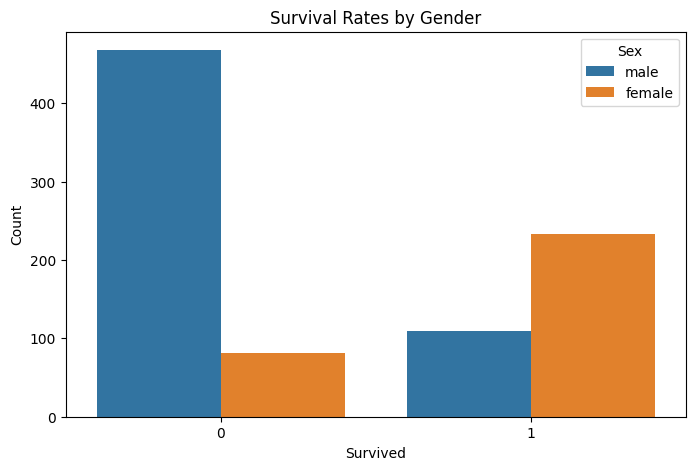

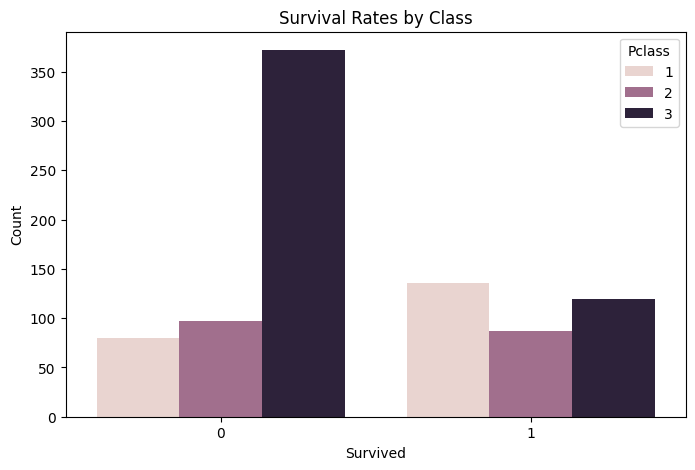

In [5]:
# Plotting survival rates by gender
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex', data=titanic_df_cleaned)
plt.title('Survival Rates by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Plotting survival rates by class
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df_cleaned)
plt.title('Survival Rates by Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()
